## Applications of Differentiation

<p>In this independent work, you are going to implement two applications Linear Approximation and Newton's Method</p>

<p>For more information, check out the textbook. </p>


In [1]:
%matplotlib notebook
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sympy.abc import x
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interact, IntSlider
%matplotlib inline

## Task 1: Linear Approximation
<p>Implement a function that takes a function and a value, and returns a linear approximation of that function at that value.</p>

In [2]:
def func(l):
    font = {'weight': 'bold', 'size': 10}
    matplotlib.rc('font', **font)
    fig, ax = plt.subplots()
    ax.spines["left"].set_position(("data", 0))
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.plot(2, 0, ">k", transform = ax.get_yaxis_transform(), clip_on = False)
    ax.plot(0, 2, "^k", transform = ax.get_xaxis_transform(), clip_on = False)
    x = np.linspace(-25, 25, 200)
    def f(x):
        return np.sqrt(x)
    
    def line (ax: int):
        if ax > 0:
             example = [i for i in range(1, ax*2)]
        else:
             example = [i for i in range(ax*2, 1)]
        result = [np.sqrt(n) for n in example]
        potential = []

        for n in result:
            if (n - int(n) <= 0.01):
                potential.append(np.power(int(n), 2))
        positive = ax; negative = ax
        closest = 0
        while True:
            def checker(pos: int, neg: int):
                if positive in potential:
                    return positive
                elif negative in potential:
                    return negative
                else:
                    return False
            if checker(positive, negative) is False:
                positive += 1
                negative -= 1
            else: 
                closest = checker(positive, negative)
                break

        return(closest)

    def slp(x):
        return 1/(2*np.sqrt(np.power(x, 2)))
    x1 = l
    y1 = f(x1)
    def line(x, x1):
        return slp (x1) * (x - x1) + y1
    ap_y = (line(x1))
    
    x_nums = np.linspace(x1-1, x+1, 25)
    ax.plot(x, f(x), 'y')
    ax.plot(x_nums,line(x_nums, x1), 'g--', linewidth = 1)
    ax.scatter(x1, y1, color = 'b', s = 30)
    ax.plot(np.linspace(ap_y, ap_y, 10),line(x_nums, x1), 'b--', linewidth = 2)


## Task 2: Newton's Method
<p>Implement a function that takes a differentiable function and returns any root of that function.</p>

In [ ]:
num=sym.symbols('x')
def slopelines(a,b,c):
  f=sym.sympify(a)
  f1=sym.lambdify(x,f)
  value_x = np.linspace(1, 7, 39)

  plt.figure(figsize = (9, 9))
  plt.plot(value_x,f2(value_x),linewidth=4)

  slope=(f2(a + h)- f2(a))/h

  plt.hlines(y= 1,xmin=a, xmax=a+h, linewidth =1, color = 'r')
  plt.text(a+h/2, 2, "h=" + str(round(h,2)))

  plt.plot(value_x,f2(a)+ slope * (value_x - a), 'tab:pink')
  plt.xlim(0,10)
  plt.ylim(0,100)


In [ ]:
@interact(n= IntSlider(35,45,234,2))
def function(n):
    slopelines("10**2",2,39/n)

interactive(children=(IntSlider(value=45, description='n', max=234, min=45, step=2), Output()), _dom_classes=(…

In [ ]:
@interact (n = IntSlider(0,3,20))
def function2(n):
    tanlines("7*x**4", n/10, 8)

interactive(children=(IntSlider(value=3, description='n', max=20, min=3), Output()), _dom_classes=('widget-int…

In [ ]:
y = sym.symbols('y')
def newtonRaphsonmethod(function):
    function = sym.sympify(function)
    f = sym.lambdify(y,function)

    yvalue = np.linespace (-8,9,87)
    plt.figure(figsize=(6,3))
    plt.plot(yvalue,f(yvalue), linewidth = 3)


    dr= sym.diff(func, y)
    y0 = 7
    e  = 0.01
    while abs (f(y))>= e:
        y1 = y0 - f(y0)/ dr.subs(y, y0)
        plt.plot((y1, y0),(0,f(y)), 'tab:orange')
        y0 = y1
    plt.xlim(0,8)
    plt.ylim(0,89) 


(0.0, 80.0)

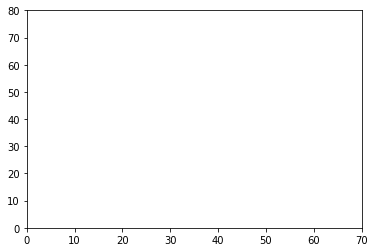

In [ ]:
num=sym.symbols('x')
def tanlines(d,e,k):
  f=sym.sympify(d)
  f1=sym.lambdify(x,f)
  value_x = np.linspace(0,8, 70)
  fig, ax = plt.subplots(figsize =(36,36))
  ax.plot(value_x, f2(value_x), linewith = 10)
  slope = sym.diff(f, x).subs(x, a)
  ax.plot(value_x, f2(a) + slope * (value_x - a), 'tab:green', linewidth = 4)
  circle = Circle ((a,f2(a)), 0.2)
  ax.add_patch(circle)


plt.xlim(0,70)
plt.ylim(0,80)

In [ ]:
@interact (n = IntSlider(0,3,20))
def function3(n):
    newtonRaphsonmethod('y**2-2')

interactive(children=(IntSlider(value=3, description='n', max=20, min=3), Output()), _dom_classes=('widget-int…